# Librerías


In [1]:
## Funciones algebráicas
import numpy as np
## Tratamiento de datos
import pandas as pd
## Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
### Visualización treemaps
!pip install squarify
import squarify
## Calendario para manejo de fechas
import calendar
## Eliminación de los avisos
import warnings
warnings.filterwarnings('ignore')


# Carga del set de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/Proyectos_Carlos/Covid'
!ls

/content/drive/My Drive/Colab Notebooks/Proyectos_Carlos/Covid
covid_cataluña.csv  covid_cat.ipynb  region_sanitaria.xlsx


In [4]:
df=pd.read_csv('covid_cataluña.csv')
df.head()


,TipusCasData,RegioSanitariaCodi,RegioSanitariaDescripcio,EdatRang,SexeCodi,SexeDescripcio,TipusCasDescripcio,NumCasos
0,21/04/2021,6100,LLEIDA,70-79,1.0,Dona,Positiu TAR,5
1,16/07/2021,7801,METROPOLITANA SUD,70-79,0.0,Home,PCR probable,2
2,14/05/2021,7803,BARCELONA CIUTAT,60-69,0.0,Home,Positiu TAR,3
3,07/11/2020,6700,CATALUNYA CENTRAL,80-89,1.0,Dona,Positiu TAR,4
4,01/11/2020,6200,CAMP DE TARRAGONA,40-49,0.0,Home,Positiu PCR,9


In [5]:
## Cambio de nombre de las columnas con el objeto de simplificarlos al máximo
df.columns=['fecha', 'cod_region', 'region', 'rango_edad', 'cod_sexo', 'sexo', 'caso_descripcion', 'num_casos']

# Detección de valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140760 entries, 0 to 140759
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             140760 non-null  object 
 1   cod_region        140760 non-null  int64  
 2   region            140760 non-null  object 
 3   rango_edad        140760 non-null  object 
 4   cod_sexo          139346 non-null  float64
 5   sexo              140760 non-null  object 
 6   caso_descripcion  140760 non-null  object 
 7   num_casos         140760 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 8.6+ MB


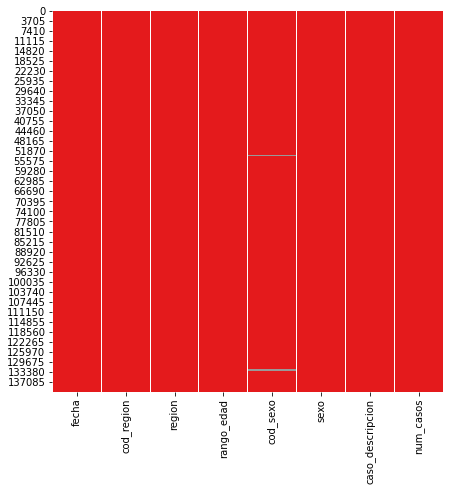

In [6]:
df.info()

df.isnull().sum()

plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(), cbar=False, cmap='Set1')
plt.show()


**Se observan valores nulos en la variable cod_sexo. En total, 1414 valores nulos**

In [7]:
## Observación de la naturaleza de esos valores nulos
### máscara para filtrar los valores nulos
null_values=df[df['cod_sexo'].isnull()]
null_values

,fecha,cod_region,region,rango_edad,cod_sexo,sexo,caso_descripcion,num_casos
39,27/03/2020,0,No classificat,No classificat,NaN,No classificat,Epidemiològic,2
121,05/11/2020,0,No classificat,No classificat,NaN,No classificat,Positiu PCR,74
310,30/05/2021,0,No classificat,No classificat,NaN,No classificat,Epidemiològic,1
970,15/12/2020,0,No classificat,90+,NaN,No classificat,Positiu PCR,2
972,03/02/2021,0,No classificat,No classificat,NaN,No classificat,Epidemiològic,2
...,...,...,...,...,...,...,...,...
139385,05/10/2020,0,No classificat,No classificat,NaN,No classificat,Epidemiològic,1
140083,05/12/2020,0,No classificat,No classificat,NaN,No classificat,Epidemiològic,2
140251,24/03/2020,0,No classificat,No classificat,NaN,No classificat,Epidemiològic,4
140410,29/08/2020,0,No classificat,No classificat,NaN,No classificat,Positiu per ELISA,1


**Se puede observar que hay un concepto denominado No classificat que resulta confuso, pues posiblemente
se debería definir como un valor nulo, ya que se corresponde con información que no está completa.**

In [8]:
### Exploración de la naturaleza del concepto "No classificat"

df[df['cod_region']==0][['cod_region', 'region']]


df['region'].unique()


array(['LLEIDA', 'METROPOLITANA SUD', 'BARCELONA CIUTAT',
       'CATALUNYA CENTRAL', 'CAMP DE TARRAGONA', 'METROPOLITANA NORD',
       'GIRONA', 'ALT PIRINEU I ARAN', 'No classificat',
       "TERRES DE L'EBRE"], dtype=object)

## Eliminación de los valores nulos

**Por lo que se puede observar, los valores nulos de la columna cod_sexo
están asociados con el concepto No classificat.
Se va a proceder a la eliminación de las observaciones que presentan valores nulos**

In [9]:
df=df.dropna(axis=0, how='any')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 139346 entries, 0 to 140759
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             139346 non-null  object 
 1   cod_region        139346 non-null  int64  
 2   region            139346 non-null  object 
 3   rango_edad        139346 non-null  object 
 4   cod_sexo          139346 non-null  float64
 5   sexo              139346 non-null  object 
 6   caso_descripcion  139346 non-null  object 
 7   num_casos         139346 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 9.6+ MB


In [10]:
## Comprobación de que no ya no aparece el concepto No classificat

for col in (df.select_dtypes(include='object').columns):
    if col!='fecha':
        print(df[col].unique())

['LLEIDA' 'METROPOLITANA SUD' 'BARCELONA CIUTAT' 'CATALUNYA CENTRAL'
 'CAMP DE TARRAGONA' 'METROPOLITANA NORD' 'GIRONA' 'ALT PIRINEU I ARAN'
 "TERRES DE L'EBRE" 'No classificat']
['70-79' '60-69' '80-89' '40-49' '50-59' '30-39' '10-19' '0-9' '90+'
 'No classificat' '20-29']
['Dona' 'Home']
['Positiu TAR' 'PCR probable' 'Positiu PCR' 'Epidemiològic'
 'Positiu per ELISA' 'Positiu per Test Ràpid']


**Se puede ver que sigue apareciendo la categoría no classificat
en las variables region y rango de edad.**

**Por ello, se va a sustituir esta categoría por un valor nulo.**

In [11]:
### Transformación de la categoría "No classificat" en valor nulo
#### región
region=[]
for value in df['region']:
    if value=='No classificat':
        value=np.nan
    else:
        value=value
    region.append(value)

df['region']=region

#### Rango de edad
rango=[]
for value in df['rango_edad']:
    if value=='No classificat':
        value=np.nan
    else:
        value=value
    rango.append(value)
df['rango_edad']=rango

In [12]:
#### Identificación de los valores nulos

df.head()

df.isnull().sum()

fecha                  0
cod_region             0
region                 2
rango_edad          1445
cod_sexo               0
sexo                   0
caso_descripcion       0
num_casos              0
dtype: int64

In [13]:
#### Eliminación de los valores nulos

index_region=list(df[df['region'].isnull()].index)
index_region

index_edad=list(df[df['rango_edad'].isnull()].index)
index_edad


[30,
 36,
 38,
 196,
 339,
 363,
 585,
 809,
 846,
 890,
 958,
 1033,
 1185,
 1412,
 1436,
 1455,
 1591,
 1818,
 2192,
 2202,
 2315,
 2371,
 2458,
 2614,
 2671,
 2679,
 2854,
 3182,
 3199,
 3270,
 3308,
 3445,
 3610,
 3622,
 3734,
 3783,
 3865,
 3917,
 3945,
 4087,
 4119,
 4148,
 4390,
 4577,
 4622,
 4727,
 4762,
 4795,
 4851,
 4906,
 4993,
 4997,
 5329,
 5355,
 5727,
 5884,
 6095,
 6242,
 6245,
 6439,
 6617,
 6639,
 6696,
 6834,
 6874,
 7071,
 7118,
 7207,
 7397,
 7441,
 7470,
 7630,
 7665,
 7758,
 7777,
 7842,
 7862,
 7942,
 8064,
 8146,
 8227,
 8284,
 8286,
 8350,
 8546,
 8723,
 8734,
 8740,
 8780,
 9035,
 9193,
 9258,
 9361,
 9378,
 9482,
 9547,
 9550,
 9619,
 9673,
 9723,
 9760,
 9906,
 9961,
 10009,
 10152,
 10185,
 10212,
 10256,
 10464,
 10588,
 10646,
 10783,
 10929,
 11020,
 11096,
 11152,
 11221,
 11413,
 11712,
 12020,
 12098,
 12149,
 12314,
 12367,
 12437,
 12448,
 12463,
 12498,
 12631,
 12675,
 12756,
 12861,
 13028,
 13313,
 13348,
 13367,
 13412,
 13454,
 13480,
 1358

In [14]:
##### Concatenación de los índices de valores nulos
index=index_region+index_edad


**Una vez identificados las dos observaciones que todavía presentan valores nulos,
se eliminan.**

In [15]:
df=df.drop(index=index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137899 entries, 0 to 140759
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fecha             137899 non-null  object 
 1   cod_region        137899 non-null  int64  
 2   region            137899 non-null  object 
 3   rango_edad        137899 non-null  object 
 4   cod_sexo          137899 non-null  float64
 5   sexo              137899 non-null  object 
 6   caso_descripcion  137899 non-null  object 
 7   num_casos         137899 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 9.5+ MB


**Ya se puede observar que no existen valore nulos.**

# Análisis Exploratorio de los Datos (EDA)

In [16]:
## Transformación de la variable fecha en variable datetime

df['fecha']=pd.to_datetime(df['fecha'], format='%d/%m/%Y')


## Creación de nuevas variables en base a la variable fecha (año, mes y día)
'''
Estas nuevas variables nos pueden aportar información interesante en el
análisis exploratorio de los datos.
'''
df['año']=df['fecha'].dt.year
df['mes']=df['fecha'].dt.month
df['dia']=df['fecha'].dt.day
df['dia_semana']=df['fecha'].dt.weekday

In [17]:
### Transformación del día de la semana

def week_day(weekday):
    if weekday==0:
        return 'lunes'
    if weekday==1:
        return 'martes'
    if weekday==2:
        return 'miercoles'
    if weekday==3:
        return 'jueves'
    if weekday==4:
        return 'viernes'
    if weekday==5:
        return 'sabado'
    if weekday==6:
        return 'domingo'

df['dia_semana']=df['dia_semana'].apply(lambda x:week_day(x))


df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137899 entries, 0 to 140759
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   fecha             137899 non-null  datetime64[ns]
 1   cod_region        137899 non-null  int64         
 2   region            137899 non-null  object        
 3   rango_edad        137899 non-null  object        
 4   cod_sexo          137899 non-null  float64       
 5   sexo              137899 non-null  object        
 6   caso_descripcion  137899 non-null  object        
 7   num_casos         137899 non-null  int64         
 8   año               137899 non-null  int64         
 9   mes               137899 non-null  int64         
 10  dia               137899 non-null  int64         
 11  dia_semana        137899 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 13.7+ MB


## Visualización de los casos diagnosticados



In [18]:
## Ordenación de los datos por fechas

data=df.sort_values(by='fecha')

print(data.head())

print(data.tail())

            fecha  cod_region            region  ... mes  dia dia_semana
36535  2020-03-01        7803  BARCELONA CIUTAT  ...   3    1    domingo
106586 2020-03-01        7803  BARCELONA CIUTAT  ...   3    1    domingo
30277  2020-03-01        7803  BARCELONA CIUTAT  ...   3    1    domingo
108954 2020-03-02        7803  BARCELONA CIUTAT  ...   3    2      lunes
109649 2020-03-02        7803  BARCELONA CIUTAT  ...   3    2      lunes

[5 rows x 12 columns]
           fecha  cod_region            region  ... mes  dia dia_semana
90570 2021-08-15        6100            LLEIDA  ...   8   15    domingo
91441 2021-08-15        7803  BARCELONA CIUTAT  ...   8   15    domingo
91994 2021-08-15        6400            GIRONA  ...   8   15    domingo
92711 2021-08-15        7803  BARCELONA CIUTAT  ...   8   15    domingo
90822 2021-08-15        6100            LLEIDA  ...   8   15    domingo

[5 rows x 12 columns]


In [19]:
## Agrupación de datos por fecha (frecuencia= 1 semana)

data_f=data.groupby(pd.Grouper(key='fecha', freq='1W'))[['num_casos']].sum().reset_index()

## Creación columna de casos acumulados se
data_f['acum_casos']=np.cumsum(data_f['num_casos'])

data_f['fecha']=data_f['fecha'].dt.strftime('%d/%m/%Y')
data_f
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       77 non-null     object
 1   num_casos   77 non-null     int64 
 2   acum_casos  77 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


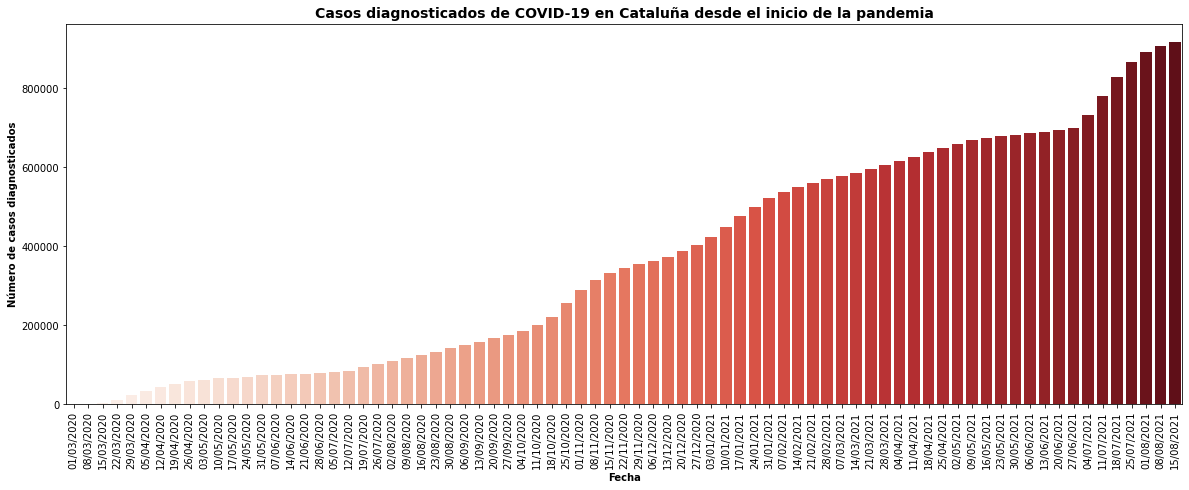

In [20]:
### Visualización casos acumulados
plt.figure(figsize=(20,7))
sns.barplot(x='fecha', y='acum_casos', data=data_f, palette='Reds')
plt.title('Casos diagnosticados de COVID-19 en Cataluña desde el inicio de la pandemia', weight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.xlabel('Fecha', weight='bold')
plt.ylabel('Número de casos diagnosticados', weight='bold')
plt.show()

**Se puede observar perfectamente como a principios de Julio, una vez finalizado el estado de alerta,
y coincidiendo con la relajación de la medidas de seguridad, comienza a incrementarse el número de Casos
derivándose esto en una quinta ola.**

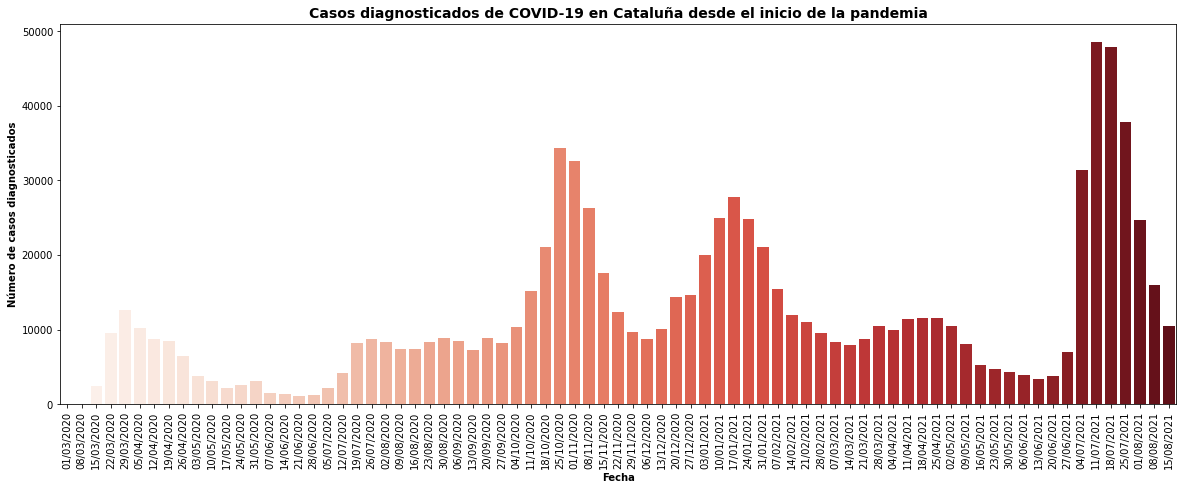

In [21]:
### Visualización número de casos registrados en cada semana desde inicio de pandemia
plt.figure(figsize=(20,7))
sns.barplot(x='fecha', y='num_casos', data=data_f, palette='Reds')
plt.title('Casos diagnosticados de COVID-19 en Cataluña desde el inicio de la pandemia', weight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.xlabel('Fecha', weight='bold')
plt.ylabel('Número de casos diagnosticados', weight='bold')
plt.show()

**Atendiendo al gráfico de casos, se puede distinguir perfectamente las distintas olas de COVID_19,
sobre todo a partir de octubre cuando comenzaron a realizarse análisis masivos por PCR.**

## Tipos de diagnósticos para la detección del virus

In [22]:
df.head()


df['caso_descripcion'].unique()


array(['Positiu TAR', 'PCR probable', 'Positiu PCR', 'Epidemiològic',
       'Positiu per ELISA', 'Positiu per Test Ràpid'], dtype=object)

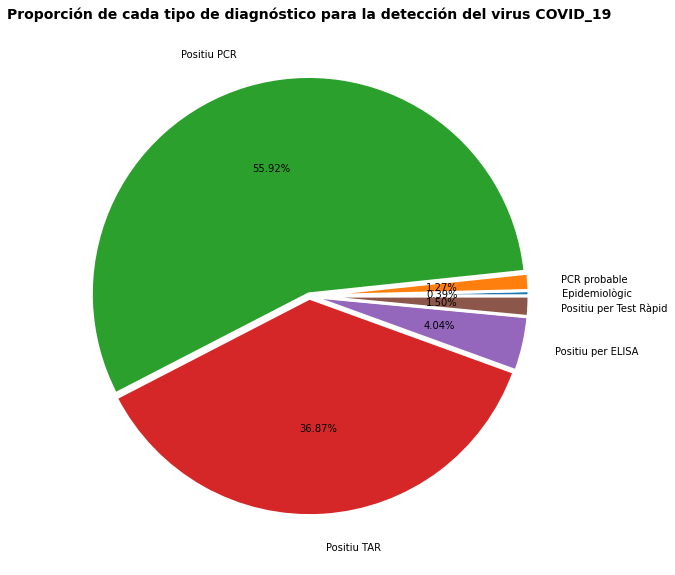

In [23]:
## Proporción de cada tipo de diagnóstico para la detección del virus

data_d=df.groupby(by=['caso_descripcion']).agg({'num_casos':'sum'}).reset_index()

values=list(data_d['num_casos'])
labels=list(data_d['caso_descripcion'])

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,
        labeldistance= 1.15,
        autopct='%.2f%%',
        explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'})
plt.title('Proporción de cada tipo de diagnóstico para la detección del virus COVID_19', weight='bold', fontsize=14)
plt.show()

**Se puede observar que el principal método de diagnóstico empleado ha sido la PCR.
Seguidamente, se encuentra el test de antígenos y ya en muchísima menos proporción
el test ELISA.**

## Evaluación de cuando comienzan a incrementarse los test pcr en el tiempo

In [24]:
### Creación de un nuevo set de datos
data_diag=data.groupby(by=[pd.Grouper(key='fecha', freq='1W'),
                       'caso_descripcion'])[['num_casos']].sum().reset_index()



data_diag=data_diag.sort_values(by=['caso_descripcion'])


data_diag

,fecha,caso_descripcion,num_casos
227,2020-11-29,Epidemiològic,16
299,2021-02-21,Epidemiològic,5
113,2020-07-19,Epidemiològic,10
305,2021-02-28,Epidemiològic,9
311,2021-03-07,Epidemiològic,11
...,...,...,...
286,2021-01-31,Positiu per Test Ràpid,41
58,2020-05-10,Positiu per Test Ràpid,436
376,2021-05-16,Positiu per Test Ràpid,31
136,2020-08-09,Positiu per Test Ràpid,423


In [25]:
### Creación de una tabla pivotante
pivot_diag=pd.pivot_table(data_diag,
                          values='num_casos',
                          index=['fecha'],
                          columns=['caso_descripcion'],
                          aggfunc=np.sum)

### cumsum
pivot_diag=pivot_diag.cumsum()

pivot_diag


caso_descripcion,Epidemiològic,PCR probable,Positiu PCR,Positiu TAR,Positiu per ELISA,Positiu per Test Ràpid
fecha,,,,,,
2020-03-01,NaN,NaN,3.0,NaN,NaN,NaN
2020-03-08,1.0,NaN,75.0,NaN,5.0,2.0
2020-03-15,62.0,2.0,2311.0,2.0,132.0,6.0
2020-03-22,215.0,27.0,11285.0,5.0,524.0,8.0
2020-03-29,354.0,126.0,22976.0,17.0,1156.0,10.0
...,...,...,...,...,...,...
2021-07-18,3598.0,10732.0,482319.0,281095.0,36687.0,13576.0
2021-07-25,3602.0,11051.0,494933.0,305846.0,36790.0,13623.0
2021-08-01,3604.0,11297.0,503397.0,321642.0,36879.0,13682.0


In [26]:
### Rellenar los valores nulos con el valor 0

pivot_diag.fillna(0, inplace=True)

pivot_diag=pivot_diag.reset_index()

pivot_diag.head()

caso_descripcion,fecha,Epidemiològic,PCR probable,Positiu PCR,Positiu TAR,Positiu per ELISA,Positiu per Test Ràpid
0,2020-03-01,0.0,0.0,3.0,0.0,0.0,0.0
1,2020-03-08,1.0,0.0,75.0,0.0,5.0,2.0
2,2020-03-15,62.0,2.0,2311.0,2.0,132.0,6.0
3,2020-03-22,215.0,27.0,11285.0,5.0,524.0,8.0
4,2020-03-29,354.0,126.0,22976.0,17.0,1156.0,10.0


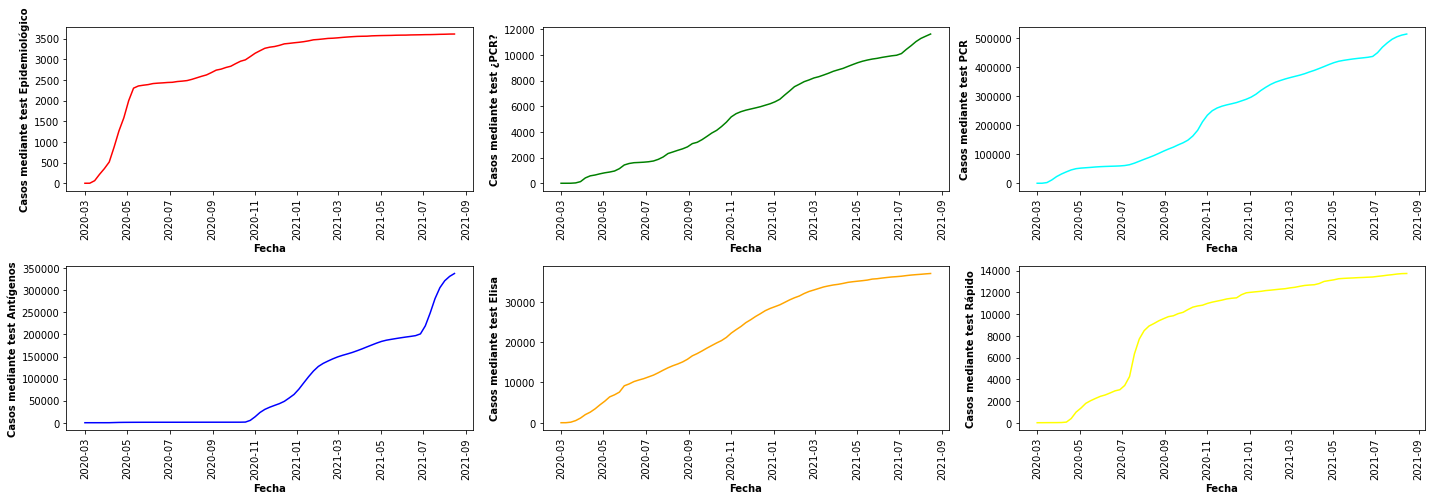

In [27]:
### Visualización de los distintos test realizados para la detección de la COVID_19
test=['Epidemiológico', '¿PCR?', 'PCR', 'Antígenos', 'Elisa', 'Rápido']
color=['red', 'green', 'cyan', 'blue', 'orange', 'yellow']


fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(20,7))
for i, col in enumerate(pivot_diag.columns[1:]):
    plt.subplot(2,3,i+1)
    axi=sns.lineplot(x='fecha', y=col, data=pivot_diag, color=color[i])
    plt.xticks(rotation=90)
    plt.xlabel('Fecha', weight='bold')
    plt.ylabel(f'Casos mediante test {test[i]}', weight='bold')
plt.tight_layout(pad=1.1)
plt.show()

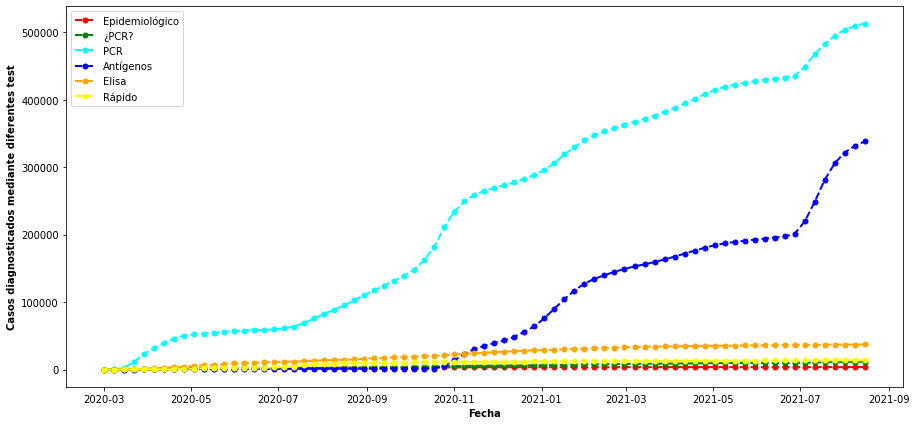

In [28]:
### Visualización conjunta de los diferentes test

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,7))
for i, col in enumerate(pivot_diag.columns[1:]):
    ax.plot(pivot_diag['fecha'], pivot_diag[col], color=color[i], marker='o', linestyle='dashed',
            linewidth=2, markersize=5, label=test[i])
plt.xlabel('Fecha', weight='bold')
plt.ylabel('Casos diagnosticados mediante diferentes test', weight='bold')
plt.legend()
plt.show()

**Uno de los aspectos más reseñables, se corresponde con el hecho de que
a finales de 2020 se empezó a utilizar con enorme asiduidad el test de antígenos
para una detección rápida y fiable del virus. Evidentemente, el test PCR es el método
más fiable y utilizado. No obstante, no se realizaron test masivos hasta finales del
año 2020, justo al comienzo de la segunda ola.**

**Como conclusión, se debe indicar que los dos principales métodos para la detección
del coronavirus son la PCR y el test de antígenos.**

# Incidencia del coronavirus por rango de edad

In [29]:
## Creación de un nuevo set de datos (agrupación del rango de edad)
data.head()


data_edad=data.groupby(by=[pd.Grouper(key='fecha', freq='1W'), 'rango_edad']).agg({'num_casos':'sum'})

data_edad=data_edad.reset_index()

data_edad['fecha']=data_edad['fecha'].dt.strftime('%d/%m/%Y')


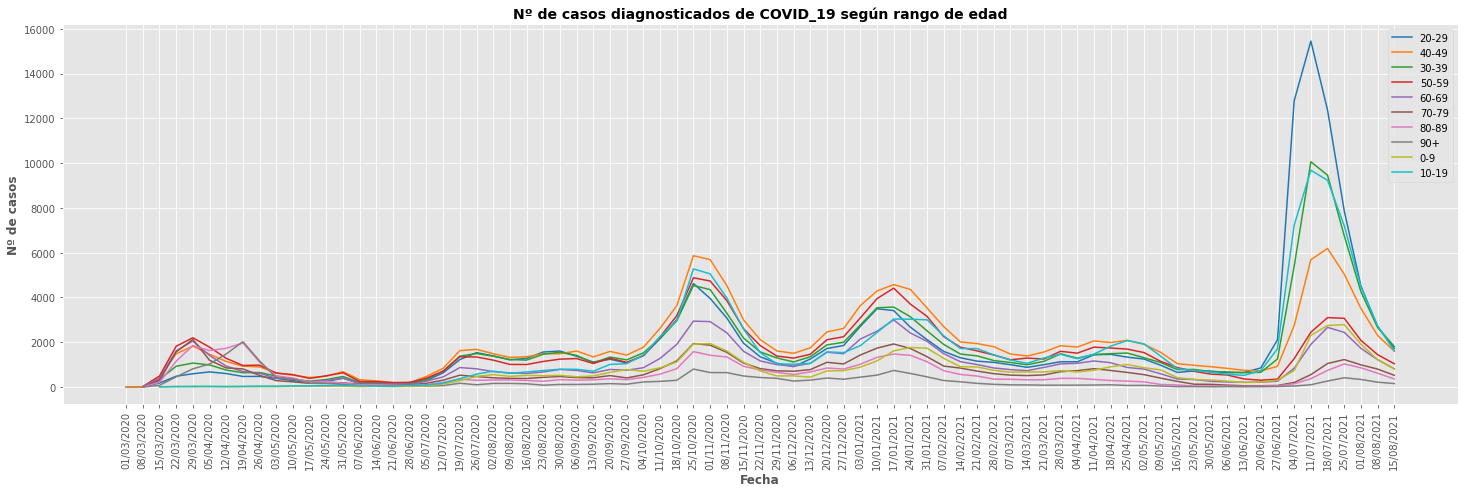

In [30]:
## Visualización de la evulución en tiempo del número de casos en base al rango de data_edad
plt.style.use('ggplot')
plt.figure(figsize=(25,7))
plt.xlabel('Fecha', weight='bold')
plt.ylabel('Nº de casos', weight='bold')
plt.title('Nº de casos diagnosticados de COVID_19 según rango de edad',
          fontsize=14, weight='bold')
plt.xticks(rotation=90)
sns.lineplot(x='fecha', y='num_casos', hue='rango_edad', data=data_edad, palette='tab10')
plt.legend(loc='best')
plt.show()

**Como se puede observar, mientras que prácticamente durante toda la pandemia
el rango de edad con mayor incidencia de casos ha sido el correspondiente a 40-49 años,
en esta última oleada se ha producido una enorme cantidad de casos en el rango
de 20-29 años, así como en el de 30-39 y 10-19.**

**Este hecho, en primer lugar, puede deberse a la finalización del estado de alarma
y las flexibilización en el control de las medidas de seguridad. Seguramente, los
jóvenes habrán incrementado significativamente sus encuentros sociales, lo que habrá
producido un incremento significativo de los casos.**

**Esta incidencia de casos también se debe a que estos colectivos no han sido vacunados
y por lo tanto son todavía un grupo sensible.
Lo que esta claro es que, en proporción, ha disminuido la incidencia en otros rangos de edad
en los que la enfermedad derivaba en casos graves, tales como 50-59, 60-69.**

### Comprobación de incidencia de casos en las principales olas de contagio

Tres olas de contagio:
Se ha considerado estas tres olas en base a la realización de test masivos
de diagnóstico.
1. 18-10-2020 a 15-11-2020
2. 27-12-2020 a 14-02-2021
3. 27-06-2021 a 08-08-2021

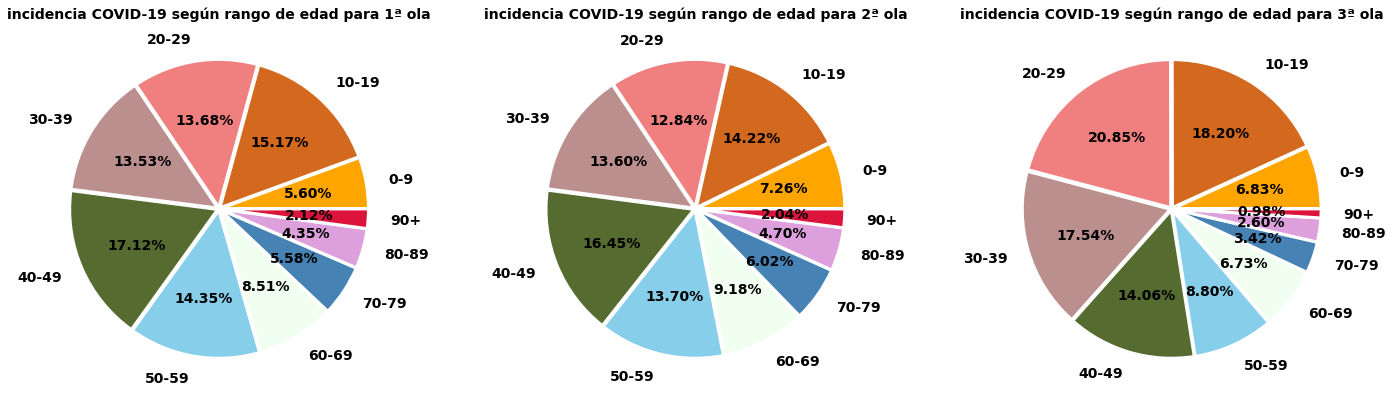

In [31]:
## Visualización de la incidencia de casos en las principales olas de contagio

data_2edad=data_edad.copy()

data_2edad['fecha']=pd.to_datetime(data_2edad['fecha'])

list_ola_i=['18-10-2020', '27-12-2020', '27-06-2021']
list_ola_f=['15-11-2020', '14-02-2021', '08-08-2021']
colors={'0-9':'orange', '10-19':'chocolate', '20-29':'lightcoral', '30-39':'rosybrown', '40-49':'darkolivegreen',
          '50-59':'skyblue', '60-69':'honeydew', '70-79':'steelblue', '80-89':'plum', '90+':'crimson'}

values={}
values[0]=[]
values[1]=[]
values[2]=[]
for index,(i,f) in enumerate(zip(list_ola_i, list_ola_f)):
    data_ola=data_2edad[(data_2edad['fecha']>i)&(data_2edad['fecha']<f)][['fecha', 'rango_edad', 'num_casos']]
    df_ola=data_ola.groupby(by=['rango_edad'])[['num_casos']].sum().reset_index()
    values[index]=list(df_ola['num_casos'])
    labels=list(df_ola['rango_edad'])

fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    axi=plt.pie(values[i], labels=labels,
            labeldistance= 1.15,
            autopct='%.2f%%',
            explode=[0.01]*10,
            wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'},
            textprops={'fontsize': 14, 'weight':'bold'},
            colors=[colors[x] for x in labels])
    plt.title(f'incidencia COVID-19 según rango de edad para {i+1}ª ola', weight='bold', fontsize=14)
plt.tight_layout(pad=1.1)
plt.show()




**Como se puede observar, el principal aspecto que diferencia la tercera ola de las
restantes es que la incidencia de casos de concentra en los rangos de edad de
10-19, 20-29 y 30-39. Estos colectivos a finales de Junio no habían sido todavía
vacunados o no tenían completa la pauta de vacunación.**

**No obstante, hay que tener en cuenta que no se tienen datos de que proporción de
la población comprede cada uno de los rangos de edad, por lo que, aunque está clara
la incidencia en base a los datos disponibles, no se pueden establecer conclusiones
del todo sólidas.**

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


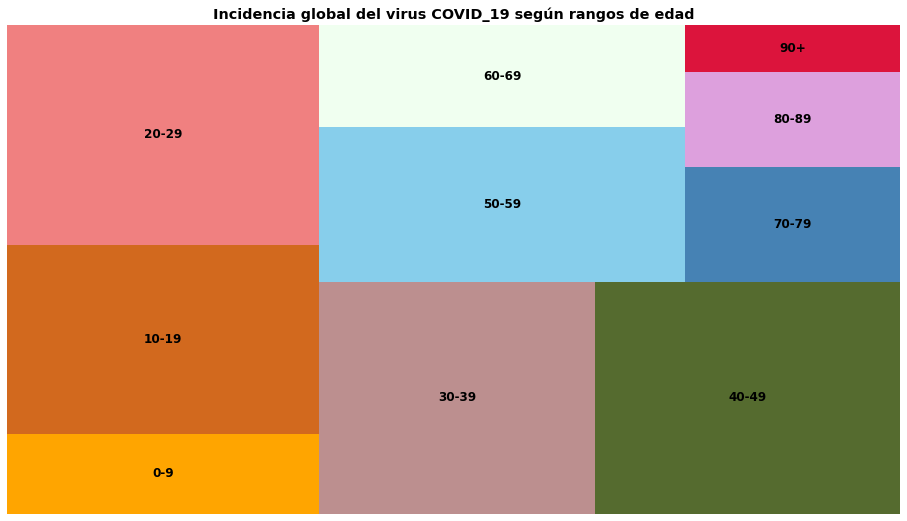

In [32]:
## Incidencia global según rangos de edad.

data_edad


data_inc=data_edad.groupby(by=['rango_edad'])[['num_casos']].sum().reset_index()

data_inc

### Creación de la figura y redimensionado
fig=plt.gcf()
ax=fig.add_subplot()
fig.set_size_inches(16,9)
### Declaración del treemap
squarify.plot(sizes=data_inc['num_casos'],
              label=data_inc['rango_edad'],
              color=[colors[x] for x in data_inc['rango_edad']],
              text_kwargs={'fontsize':12, 'fontname':"Calibri",'weight':'bold'},
              )
plt.title('Incidencia global del virus COVID_19 según rangos de edad', weight='semibold')
plt.axis('off')
plt.show()

**El treemap muestra la incidencia del virus en cada rango de edad desde el comienzo
de la pandemia. Aquí se puede ver como desde el comienzo de la pandemia el principal
rango de edad afectado ha sido el de 40-49 años.**

# Incidencia del coronavirus según género

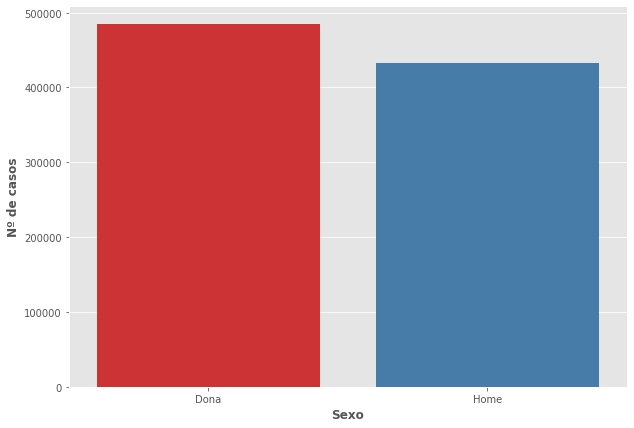

In [33]:
data_sexo=data.groupby(by=['sexo'])[['num_casos']].sum().reset_index()

data_sexo['%']=round(data_sexo['num_casos']/data_sexo['num_casos'].sum()*100, 2)

data_sexo

plt.figure(figsize=(10,7))
sns.barplot(x='sexo', y='num_casos', data=data_sexo, palette='Set1')
plt.xlabel('Sexo', weight='bold')
plt.ylabel('Nº de casos', weight='bold')
plt.show()

**La proporción de casos entre mujeres y hombres resulta muy similar, resultando del
52.82% en mujeres y 47.96% en hombres.**

In [34]:
data_s=data.groupby(by=['rango_edad', 'sexo'])[['num_casos']].sum().reset_index()
data_s

,rango_edad,sexo,num_casos
0,0-9,Dona,25698
1,0-9,Home,26678
2,10-19,Dona,60996
3,10-19,Home,62612
4,20-29,Dona,74105
5,20-29,Home,70248
6,30-39,Dona,71950
7,30-39,Home,62347
8,40-49,Dona,79354
9,40-49,Home,69210


In [35]:
## Creación de una columna de proporción de casos en % para cada uno de los rangos de edad
def incidence(x):
    if x=='0-9':
        return (data_s['num_casos'][0]+data_s['num_casos'][1])
    if x=='10-19':
        return (data_s['num_casos'][2]+data_s['num_casos'][3])
    if x=='20-29':
        return (data_s['num_casos'][4]+data_s['num_casos'][5])
    if x=='30-39':
        return (data_s['num_casos'][6]+data_s['num_casos'][7])
    if x=='40-49':
        return (data_s['num_casos'][8]+data_s['num_casos'][9])
    if x=='50-59':
        return (data_s['num_casos'][10]+data_s['num_casos'][11])
    if x=='60-69':
        return (data_s['num_casos'][12]+data_s['num_casos'][13])
    if x=='70-79':
        return (data_s['num_casos'][14]+data_s['num_casos'][15])
    if x=='80-89':
        return (data_s['num_casos'][16]+data_s['num_casos'][17])
    if x=='90+':
        return (data_s['num_casos'][18]+data_s['num_casos'][19])

data_s['casos_edad']=data_s['rango_edad'].apply(incidence)

data_s['%']=round(data_s['num_casos']/data_s['casos_edad'], 2)*100

data_s

,rango_edad,sexo,num_casos,casos_edad,%
0,0-9,Dona,25698,52376,49.0
1,0-9,Home,26678,52376,51.0
2,10-19,Dona,60996,123608,49.0
3,10-19,Home,62612,123608,51.0
4,20-29,Dona,74105,144353,51.0
5,20-29,Home,70248,144353,49.0
6,30-39,Dona,71950,134297,54.0
7,30-39,Home,62347,134297,46.0
8,40-49,Dona,79354,148564,53.0
9,40-49,Home,69210,148564,47.0


**Como se puede observar de la información obtenida, no existen diferencias apreciables
de incidencia de la enfermedad entre hombres y mujeres. Únicamente existen diferencias
significativas en los rangos de edad de 80-89 y 90+. Seguramente, este hecho se debe
a que la esperanza de vida es mayor para mujeres que hombres. Por tanto, resulta lógico
que haya mayor indicencia de la enfermedad en mujeres que hombres.**

# Ciudades y distritos más afectados por la incidencia del coronavirus

In [36]:
## Creación del set de datos que agrupe el número de casos en cada ciudad.

data_ciudad=data.groupby(by=['region', 'cod_region']).agg({'num_casos':'sum'}).reset_index()
data_ciudad


,region,cod_region,num_casos
0,ALT PIRINEU I ARAN,7100,8819
1,BARCELONA CIUTAT,7803,223493
2,CAMP DE TARRAGONA,6200,59739
3,CATALUNYA CENTRAL,6700,65156
4,GIRONA,6400,98622
5,LLEIDA,6100,45967
6,METROPOLITANA NORD,7802,237773
7,METROPOLITANA SUD,7801,163283
8,TERRES DE L'EBRE,6300,14009


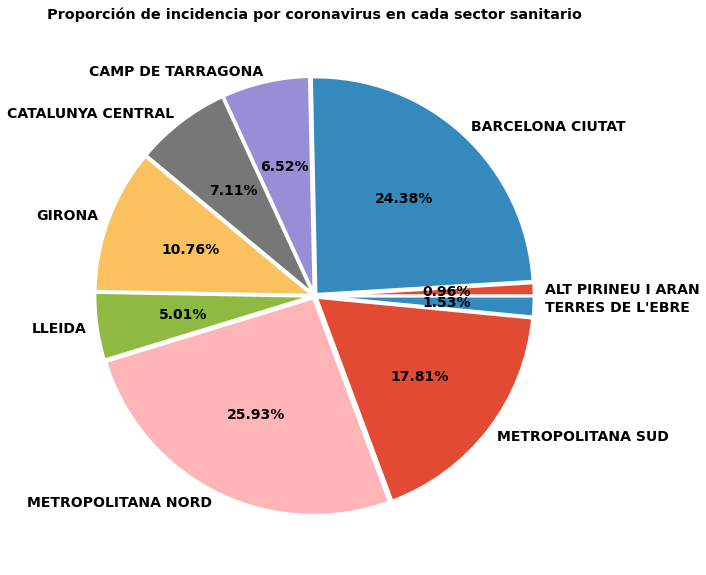

In [37]:
## Visualización mediante gráfico circular de la incidencia en cada
## sector sanitario.

plt.figure(figsize=(10,10))
plt.pie(x=list(data_ciudad['num_casos']),
        labels=list(data_ciudad['region']),
        labeldistance= 1.05,
        autopct='%.2f%%',
        explode=[0.01]*9,
        wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'},
        textprops={'fontsize': 14, 'weight':'bold'},
        )
plt.title('Proporción de incidencia por coronavirus en cada sector sanitario', weight='bold')
plt.show()

**Como se puede ver, la provincia de Barcelona (Barcelona ciudad y el área metropolitana)
es la que mayor incidencia presenta de toda Cataluña. No obstante, no se ha tenido
en cuenta la población que presenta cada provincia para normalizar los datos.**

**Si se quiere saber de forma objetivo que provincias han sufrido con mayor intensidad
el efecto de la pandemia, se debe normalizar los datos en base al número de habitantes.
Aquí se puede utilizar el concepto de incidencia por cada 100000 habitantes.**

In [38]:
## Set de datos con la población existente en cada distrito sanitario
poblacion=pd.read_excel('region_sanitaria.xlsx')
poblacion


,region,cod_region,poblacion
0,ALT PIRINEU I ARAN,7100,72276
1,BARCELONA CIUTAT,7803,1664182
2,CAMP DE TARRAGONA,6200,521286
3,CATALUNYA CENTRAL,6700,407606
4,GIRONA,6400,781788
5,LLEIDA,6100,431183
6,METROPOLITANA NORD,7802,1118723
7,METROPOLITANA SUD,7801,931350
8,TERRES DE L'EBRE,6300,178387


In [39]:
## Fusión de la columna población en el set de datos inicial

data_c=data_ciudad.merge(poblacion[['cod_region','poblacion']], on='cod_region', how='inner')


data_c

,region,cod_region,num_casos,poblacion
0,ALT PIRINEU I ARAN,7100,8819,72276
1,BARCELONA CIUTAT,7803,223493,1664182
2,CAMP DE TARRAGONA,6200,59739,521286
3,CATALUNYA CENTRAL,6700,65156,407606
4,GIRONA,6400,98622,781788
5,LLEIDA,6100,45967,431183
6,METROPOLITANA NORD,7802,237773,1118723
7,METROPOLITANA SUD,7801,163283,931350
8,TERRES DE L'EBRE,6300,14009,178387


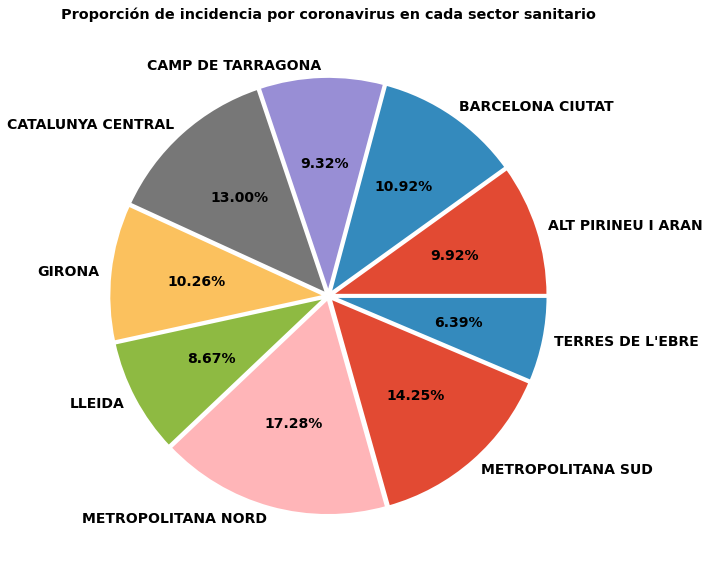

In [40]:
## Generación de columna casos X 100000hab

data_c['casosx100000 hab']=data_c['num_casos']/data_c['poblacion']*100000

data_c
## Visualización mediante gráfico circular de la incidencia en cada
## sector sanitario (casos x 100000 hab).
plt.figure(figsize=(10,10))
plt.pie(x=list(data_c['casosx100000 hab']),
        labels=list(data_c['region']),
        labeldistance= 1.05,
        autopct='%.2f%%',
        explode=[0.01]*9,
        wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'},
        textprops={'fontsize': 14, 'weight':'bold'},
        )
plt.title('Proporción de incidencia por coronavirus en cada sector sanitario', weight='bold')
plt.show()

**De esta forma ya se puede saber con mayor seguridad que indicencia real ha tenido
el virus en cada distrito sanitario. Resaltar que, tal y como se puede ver al comparar
ambos gráficos, la ciudad de Barcelona no ha resultado ser el distrito sanitario más
golpeado por el coronavirus.**